# Importing Liberaries

In [0]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, Input, Flatten, Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, concatenate
from keras.models import Model, Sequential
from tensorflow.keras import regularizers


# Dataset Import

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
test_data1 = pd.read_csv('/content/gdrive/My Drive/Dataset - DL/Data 1/train.csv')
test_data2 = pd.read_csv('/content/gdrive/My Drive/Dataset - DL/Data 2/data.csv')
test_data3 = pd.read_csv('/content/gdrive/My Drive/Dataset - DL/Data 3/covid19.csv', names=["date", "url", "title", "body"])
test_data4 = pd.read_csv('/content/gdrive/My Drive/Dataset - DL/Data 3/falsehood.csv', names=["date", "url", "title", "body"])

In [28]:
test_data1.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [29]:
test_data2.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [30]:
test_data3.head(10)

,date,url,title,body
0,2020-03-17 17:04:30 UTC,https://democratherald.com/news/national/the-l...,The Latest: Trump: US builders should hand ove...,"With a population of 46 million, Spain became ..."
1,2020-03-15 10:32:24 UTC,https://www.ballinaadvocate.com.au/news/mum-op...,Mum opts to keep kids home to stop spread of C...,"The spokeswoman said until then, they were wor..."
2,2020-03-25 05:16:51 UTC,https://www.9and10news.com/i/the-latest-south-...,The Latest: South Korea to quarantine some arr...,"Wuhan will remain locked down until April 8, w..."
3,2020-03-18 09:49:56 UTC,https://www.nytimes.com/2020/03/18/world/asia/...,China Defends Expulsion of American Journalist...,"Under Mr. Xi, the news media has come under an..."
4,2020-03-19 02:18:24 UTC,https://www.pakistantelegraph.com/news/2643497...,Why New Zealand needs to continue decisive act...,With some of the toughest border restrictions ...
5,2020-03-13 19:47:48 UTC,https://www.postsouth.com/zz/news/20200313/cor...,Coronavirus updates: Trump expected to declare...,Worries have grown that the White House and ot...
6,2020-03-05 13:34:23 UTC,https://www.politico.com/newsletters/illinois-...,"BIDEN, SANDERS RAMP UP THE ADS — BATTLE ROYAL ...",Trump's vaccine hyperbole complicates coronavi...
7,2020-03-26 10:18:53 UTC,https://www.ndtv.com/business/government-coron...,government coronavirus economic package pf con...,Government Provides Relief In Provident Fund C...
8,2020-03-19 18:18:33 UTC,https://www.myiowainfo.com/syndicated-article/...,"Slayer's Gary Holt says he has ""all the sympto...","While he's hunkered down at home, Holt plans t..."
9,2020-03-22 20:48:04 UTC,https://www.kgns.tv/content/news/As-crisis-dee...,"As coronavirus crisis deepens, congressional r...",Yet while the congressional leaders worked to ...


In [31]:
test_data3['label'] = 0
test_data3.head()

,date,url,title,body,label
0,2020-03-17 17:04:30 UTC,https://democratherald.com/news/national/the-l...,The Latest: Trump: US builders should hand ove...,"With a population of 46 million, Spain became ...",0
1,2020-03-15 10:32:24 UTC,https://www.ballinaadvocate.com.au/news/mum-op...,Mum opts to keep kids home to stop spread of C...,"The spokeswoman said until then, they were wor...",0
2,2020-03-25 05:16:51 UTC,https://www.9and10news.com/i/the-latest-south-...,The Latest: South Korea to quarantine some arr...,"Wuhan will remain locked down until April 8, w...",0
3,2020-03-18 09:49:56 UTC,https://www.nytimes.com/2020/03/18/world/asia/...,China Defends Expulsion of American Journalist...,"Under Mr. Xi, the news media has come under an...",0
4,2020-03-19 02:18:24 UTC,https://www.pakistantelegraph.com/news/2643497...,Why New Zealand needs to continue decisive act...,With some of the toughest border restrictions ...,0


In [32]:
test_data4['label'] = 1
test_data4.head()

,date,url,title,body,label
0,2020-02-07 17:03:45 UTC,https://www.bbc.com/news/world-europe-51413870,Coronavirus: Russian media hint at US conspiracy,"The report also rehashes old, false claims by ...",1
1,2020-03-05 10:48:15 UTC,https://www.middleeasteye.net/news/coronavirus...,"Conspiracies, remedies, remixes: Five ways the...",She said the Gulf emirate spread coronavirus t...,1
2,2020-03-19 22:17:40 UTC,https://www.standardmedia.co.ke/article/200136...,Why naming COVID-19 patients will help State f...,"Therefore, when one relates to the experiences...",1
3,2020-02-17 06:48:00 UTC,https://www.rediff.com/news/report/china-virus...,"China virus toll rises to 1,770; cases up to 7...",Ghebreyesus also met Chinese Foreign Minister ...,1
4,2020-03-26 01:16:45 UTC,https://www.nbcnews.com/news/asian-america/hou...,House members introduce resolution to pin coro...,"In California, an Asian teen was sent to the e...",1


In [33]:
print('Shape of Dataset 1 :', test_data1.shape)
print('Shape of Dataset 2 :', test_data2.shape)
print('Shape of Dataset 3 :', test_data3.shape)
print('Shape of Dataset 4 :', test_data4.shape)

Shape of Dataset 1 : (20800, 5)
Shape of Dataset 2 : (4009, 4)
Shape of Dataset 3 : (2848383, 5)
Shape of Dataset 4 : (60172, 5)


In [0]:
test = test_data3.head(20000)

In [35]:
test

,date,url,title,body,label
0,2020-03-17 17:04:30 UTC,https://democratherald.com/news/national/the-l...,The Latest: Trump: US builders should hand ove...,"With a population of 46 million, Spain became ...",0
1,2020-03-15 10:32:24 UTC,https://www.ballinaadvocate.com.au/news/mum-op...,Mum opts to keep kids home to stop spread of C...,"The spokeswoman said until then, they were wor...",0
2,2020-03-25 05:16:51 UTC,https://www.9and10news.com/i/the-latest-south-...,The Latest: South Korea to quarantine some arr...,"Wuhan will remain locked down until April 8, w...",0
3,2020-03-18 09:49:56 UTC,https://www.nytimes.com/2020/03/18/world/asia/...,China Defends Expulsion of American Journalist...,"Under Mr. Xi, the news media has come under an...",0
4,2020-03-19 02:18:24 UTC,https://www.pakistantelegraph.com/news/2643497...,Why New Zealand needs to continue decisive act...,With some of the toughest border restrictions ...,0
...,...,...,...,...,...
19995,2020-03-21 03:17:06 UTC,https://www.kalb.com/content/news/FDA-warns-of...,FDA warns of fraudulent coronavirus diagnostic...,"WASHINGTON, D.C. (FDA) - The U.S. Food and Dru...",0
19996,2020-02-17 16:17:23 UTC,https://www.wftw.com/news/5-things-to-know-for...,"5 things to know for February 17: Coronavirus,...",Sign up here.) 1. Coronavirus As the coronavir...,0
19997,2020-02-15 12:02:54 UTC,https://www.smdailyjournal.com/news/world/us-d...,US defense chief slams China as rising threat ...,"MUNICH, Germany (AP) — U.S. Defense Secretary ...",0
19998,2020-02-29 20:32:50 UTC,https://www.abbynews.com/news/public-health-ag...,Public health agency weighs stronger COVID-19 ...,The nurses' unions warned the national guideli...,0


In [36]:
test_data3 = test_data3.drop_duplicates(keep = False)
test_data4 = test_data4.drop_duplicates(keep = False)

merged = pd.concat([test_data3.head(30000), test_data4.head(20000)])
merged['id'] = range(1, len(merged) + 1)
merged = merged[['id', 'date','url', 'title', 'body', 'label']]
merged = shuffle(shuffle(merged))
merged.head(20)

,id,date,url,title,body,label
16349,16350,2020-03-03 11:20:31 UTC,https://www.richmondandtwickenhamtimes.co.uk/n...,Iran announces 77 deaths amid coronavirus outb...,Virus outbreak in Iran / Virus Outbreak Mideas...,0
12263,42264,2020-03-18 01:33:49 UTC,https://www.washingtontimes.com/news/2020/mar/...,Trump defends virus tweet as China kicks out m...,Secretary of State Mike Pompeo this week also ...,1
21457,21458,2020-03-23 11:17:44 UTC,https://www.nbc15.com/content/news/Pompeo-rush...,Pompeo rushes to Afghan capital to revive flag...,The urgency of Pompeo's surprise visit was hig...,0
6328,36329,2020-03-20 07:34:36 UTC,https://www.europesun.com/news/264360610/analy...,Analysts: Russia Using Virus Crisis to Sow Dis...,WASHINGTON - Russia is very likely behind a di...,1
16230,16231,2020-03-12 11:49:48 UTC,https://www.funds-europe.com/news/mixed-reacti...,Mixed reactions as BoE slashes rates in respon...,"While financial conditions are not yet tight, ...",0
26073,26074,2020-03-01 16:03:35 UTC,https://www.nbcchicago.com/tag/louvre-museum/,Louvre museum – NBC Chicago,Louvre museum 13 mins ago The spreading coron...,0
28706,28707,2020-03-26 03:01:35 UTC,https://www.nknews.org/2020/03/stay-firm-on-no...,"Stay firm on North Korea ""pressure"" campaign, ...",The world must remain united in efforts to pre...,0
4851,34852,2020-03-11 14:34:25 UTC,https://citizen.co.za/news/south-africa/health...,Western Cape's Covid-19 outbreak response team...,I have convened a special cabinet on Friday wh...,1
17178,17179,2020-03-17 04:33:20 UTC,https://accesswdun.com/article/2020/3/885224,Georgia's park quarantine has 1 resident as vi...,"Separately, 124 passengers flown in from the G...",0
10294,10295,2020-02-24 21:31:47 UTC,https://wbckfm.com/hundreds-being-monitored-in...,Hundreds Being Monitored In Michigan For Coron...,Officials with the Michigan Department of Heal...,0


# Data Pre-Processing

**Dropping the NULL**





In [37]:
test_data1.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [38]:
test_data2.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [39]:
merged.columns

Index(['id', 'date', 'url', 'title', 'body', 'label'], dtype='object')

In [40]:
# # Dropping label field
df_train1 = test_data1
df_train2 = test_data2
df_train3 = merged

# Removing (dropping) the null values
print('Train Data 1:\n==========\n',test_data1.isna().sum())
df_train1[['title', 'author']] = test_data1[['title', 'author']].fillna(value = 'Missing')
df_train1 = df_train1.dropna()
label = df_train1['label']

print('\nTrain Data 2:\n==========\n',test_data2.isna().sum())
test_data2[['URLs', 'Headline']] = test_data2[['URLs', 'Headline']].fillna(value = 'Missing')
df_train2 = df_train2.dropna()
label1 = df_train2['Label']

print('\nTrain Data 3:\n==========\n',test_data3.isna().sum())
test_data3[['url', 'title']] = test_data3[['url', 'title']].fillna(value = 'Missing')
df_train3 = df_train3.dropna()
label2 = df_train3['label']

# df_train1.shape
# df_train2.shape

Train Data 1:
 id           0
title      558
author    1957
text        39
label        0
dtype: int64

Train Data 2:
 URLs         0
Headline     0
Body        21
Label        0
dtype: int64

Train Data 3:
 date        0
url         0
title    1888
body        0
label       0
dtype: int64


df_train1 => test_dataset1 excluding Label
, label => test_dataset1 Label

df_train2 => test_dataset2 excluding Label
, label1 => test_dataset2 Label


**Converting the data to lower case**



In [41]:
# Converting text to lower case
df_train1 = df_train1.apply(lambda x: x.astype(str).str.lower())
df_train2 = df_train2.apply(lambda x: x.astype(str).str.lower())
df_train3 = df_train3.apply(lambda x: x.astype(str).str.lower())

print(df_train1.shape)
print(df_train2.shape)
print(df_train3.shape)

(20761, 5)
(3988, 4)
(49969, 6)


**Removing Punctuations and HTML Tags**

In [0]:
df_train1['text'] = df_train1['text'].str.replace('[^\s\w]','')
df_train1['text'] = df_train1['text'].str.replace('<.*?>','')
df_train1['title'] = df_train1['title'].str.replace('[^\s\w]','')
df_train1['title'] = df_train1['title'].str.replace('<.*?>','')

df_train2['Headline'] = df_train2['Headline'].str.replace('[^\s\w]','')
df_train2['Headline'] = df_train2['Headline'].str.replace('<.*?>','')
df_train2['Body'] = df_train2['Body'].str.replace('[^\s\w]','')
df_train2['Body'] = df_train2['Body'].str.replace('<.*?>','')

df_train3['title'] = df_train3['title'].str.replace('[^\s\w]','')
df_train3['title'] = df_train3['title'].str.replace('<.*?>','')
df_train3['body'] = df_train3['body'].str.replace('[^\s\w]','')
df_train3['body'] = df_train3['body'].str.replace('<.*?>','')

**Tokenizing**

In [43]:
nltk.download('punkt')

df_train1['text_token'] = df_train1['text'].apply(lambda x: word_tokenize(x))
df_train1['title_token'] = df_train1['title'].apply(lambda x: word_tokenize(x))

df_train2['Headline_token'] = df_train2['Headline'].apply(lambda x: word_tokenize(x))
df_train2['Body_token'] = df_train2['Body'].apply(lambda x: word_tokenize(x))

df_train3['title_token'] = df_train3['title'].apply(lambda x: word_tokenize(x))
df_train3['body_token'] = df_train3['body'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
df_train1

,id,title,author,text,label,text_token,title_token
0,0,house dem aide we didnt even see comeys letter...,darrell lucus,house dem aide we didnt even see comeys letter...,1,"[house, dem, aide, we, didnt, even, see, comey...","[house, dem, aide, we, didnt, even, see, comey..."
1,1,flynn hillary clinton big woman on campus bre...,daniel j. flynn,ever get the feeling your life circles the rou...,0,"[ever, get, the, feeling, your, life, circles,...","[flynn, hillary, clinton, big, woman, on, camp..."
2,2,why the truth might get you fired,consortiumnews.com,why the truth might get you fired october 29 2...,1,"[why, the, truth, might, get, you, fired, octo...","[why, the, truth, might, get, you, fired]"
3,3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1,"[videos, 15, civilians, killed, in, single, us...","[15, civilians, killed, in, single, us, airstr..."
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1,"[print, an, iranian, woman, has, been, sentenc...","[iranian, woman, jailed, for, fictional, unpub..."
...,...,...,...,...,...,...,...
20795,20795,rapper ti trump a poster child for white supre...,jerome hudson,rapper t i unloaded on black celebrities who m...,0,"[rapper, t, i, unloaded, on, black, celebritie...","[rapper, ti, trump, a, poster, child, for, whi..."
20796,20796,nfl playoffs schedule matchups and odds the n...,benjamin hoffman,when the green bay packers lost to the washing...,0,"[when, the, green, bay, packers, lost, to, the...","[nfl, playoffs, schedule, matchups, and, odds,..."
20797,20797,macys is said to receive takeover approach by ...,michael j. de la merced and rachel abrams,the macys of today grew from the union of seve...,0,"[the, macys, of, today, grew, from, the, union...","[macys, is, said, to, receive, takeover, appro..."
20798,20798,nato russia to hold parallel exercises in balkans,alex ansary,nato russia to hold parallel exercises in balk...,1,"[nato, russia, to, hold, parallel, exercises, ...","[nato, russia, to, hold, parallel, exercises, ..."


In [45]:
df_train2

,URLs,Headline,Body,Label,Headline_token,Body_token
0,http://www.bbc.com/news/world-us-canada-414191...,four ways bob corker skewered donald trump,image copyright getty images\non sunday mornin...,1,"[four, ways, bob, corker, skewered, donald, tr...","[image, copyright, getty, images, on, sunday, ..."
1,https://www.reuters.com/article/us-filmfestiva...,linklaters war veteran comedy speaks to modern...,london reuters last flag flying a comedydrama...,1,"[linklaters, war, veteran, comedy, speaks, to,...","[london, reuters, last, flag, flying, a, comed..."
2,https://www.nytimes.com/2017/10/09/us/politics...,trumps fight with corker jeopardizes his legis...,the feud broke into public view last week when...,1,"[trumps, fight, with, corker, jeopardizes, his...","[the, feud, broke, into, public, view, last, w..."
3,https://www.reuters.com/article/us-mexico-oil-...,egypts cheiron wins tieup with pemex for mexic...,mexico city reuters egypts cheiron holdings l...,1,"[egypts, cheiron, wins, tieup, with, pemex, fo...","[mexico, city, reuters, egypts, cheiron, holdi..."
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,jason aldean opens snl with vegas tribute,country singer jason aldean who was performing...,1,"[jason, aldean, opens, snl, with, vegas, tribute]","[country, singer, jason, aldean, who, was, per..."
...,...,...,...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,cnn and globalist exposed steve quayle and al...,vietnam is in great danger you must publish an...,0,"[cnn, and, globalist, exposed, steve, quayle, ...","[vietnam, is, in, great, danger, you, must, pu..."
4004,http://beforeitsnews.com/sports/2017/09/trends...,trends to watch,trends to watch\n of readers think this story ...,0,"[trends, to, watch]","[trends, to, watch, of, readers, think, this, ..."
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,trump jr is soon to give a 30minute speech for...,trump jr is soon to give a 30minute speech for...,0,"[trump, jr, is, soon, to, give, a, 30minute, s...","[trump, jr, is, soon, to, give, a, 30minute, s..."
4007,https://www.reuters.com/article/us-china-pharm...,china to accept overseas trial data in bid to ...,shanghai reuters china said it plans to accep...,1,"[china, to, accept, overseas, trial, data, in,...","[shanghai, reuters, china, said, it, plans, to..."


In [46]:
df_train3

,id,date,url,title,body,label,title_token,body_token
16349,16350,2020-03-03 11:20:31 utc,https://www.richmondandtwickenhamtimes.co.uk/n...,iran announces 77 deaths amid coronavirus outb...,virus outbreak in iran virus outbreak mideast...,0,"[iran, announces, 77, deaths, amid, coronaviru...","[virus, outbreak, in, iran, virus, outbreak, m..."
12263,42264,2020-03-18 01:33:49 utc,https://www.washingtontimes.com/news/2020/mar/...,trump defends virus tweet as china kicks out m...,secretary of state mike pompeo this week also ...,1,"[trump, defends, virus, tweet, as, china, kick...","[secretary, of, state, mike, pompeo, this, wee..."
21457,21458,2020-03-23 11:17:44 utc,https://www.nbc15.com/content/news/pompeo-rush...,pompeo rushes to afghan capital to revive flag...,the urgency of pompeos surprise visit was high...,0,"[pompeo, rushes, to, afghan, capital, to, revi...","[the, urgency, of, pompeos, surprise, visit, w..."
6328,36329,2020-03-20 07:34:36 utc,https://www.europesun.com/news/264360610/analy...,analysts russia using virus crisis to sow disc...,washington russia is very likely behind a dis...,1,"[analysts, russia, using, virus, crisis, to, s...","[washington, russia, is, very, likely, behind,..."
16230,16231,2020-03-12 11:49:48 utc,https://www.funds-europe.com/news/mixed-reacti...,mixed reactions as boe slashes rates in respon...,while financial conditions are not yet tight m...,0,"[mixed, reactions, as, boe, slashes, rates, in...","[while, financial, conditions, are, not, yet, ..."
...,...,...,...,...,...,...,...,...
18946,48947,2020-03-21 20:48:00 utc,https://www.manilatimes.net/2020/03/22/busines...,the power of the social media community the m...,journalists from various news organizations me...,1,"[the, power, of, the, social, media, community...","[journalists, from, various, news, organizatio..."
7790,7791,2020-03-10 21:19:51 utc,https://www.thebigstation93blx.com/news/corona...,coronavirus has halted these concerts festival...,with all the concerns reedpop which organizes...,0,"[coronavirus, has, halted, these, concerts, fe...","[with, all, the, concerns, reedpop, which, org..."
7053,7054,2020-03-23 04:32:55 utc,https://www.news-herald.com/entertainment/harv...,harvey weinstein reportedly tests positive for...,the disgraced movie mogul who is days into hi...,0,"[harvey, weinstein, reportedly, tests, positiv...","[the, disgraced, movie, mogul, who, is, days, ..."
1292,31293,2020-03-17 22:18:46 utc,https://www.the-leader.com/zz/news/20200317/tr...,trump says hes looking at big bold economic st...,trump told reporters complaining in particular...,1,"[trump, says, hes, looking, at, big, bold, eco...","[trump, told, reporters, complaining, in, part..."


**Stemming**

In [0]:
ps = PorterStemmer() 

df_train1['text'] = df_train1['text_token'].apply(lambda x: list(ps.stem(i) for i in x))
df_train1['title'] = df_train1['title_token'].apply(lambda x: list(ps.stem(i) for i in x))

df_train2['Headline'] = df_train2['Headline_token'].apply(lambda x: list(ps.stem(i) for i in x))
df_train2['Body'] = df_train2['Body_token'].apply(lambda x: list(ps.stem(i) for i in x))

df_train3['title'] = df_train3['title_token'].apply(lambda x: list(ps.stem(i) for i in x))
df_train3['body'] = df_train3['body_token'].apply(lambda x: list(ps.stem(i) for i in x))

**Removing STOP words and Rejoining**

In [48]:
# Removing the stop words and Rejoining
nltk.download('stopwords')
stops = set(stopwords.words("english"))                  

df_train1['title'] = df_train1['title'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))
df_train1['text'] = df_train1['text'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))

df_train2['Headline'] = df_train2['Headline'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))
df_train2['Body'] = df_train2['Body'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))

df_train3['title'] = df_train3['title'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))
df_train3['body'] = df_train3['body'].apply(lambda x: ' '.join(list(i for i in x if i not in stops)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatizing**

In [49]:
# Lammatizing
nltk.download('wordnet')
lamatizer = WordNetLemmatizer()

df_train1['text'].apply(lambda x: lamatizer.lemmatize(x))
df_train1['title'].apply(lambda x: lamatizer.lemmatize(x))

df_train2['Headline'].apply(lambda x: lamatizer.lemmatize(x))
df_train2['Body'].apply(lambda x: lamatizer.lemmatize(x))

df_train3['title'].apply(lambda x: lamatizer.lemmatize(x))
df_train3['body'].apply(lambda x: lamatizer.lemmatize(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


16349    viru outbreak iran viru outbreak mideast iran ...
12263    secretari state mike pompeo thi week also crit...
21457    urgenc pompeo surpris visit wa highlight fact ...
6328     washington russia veri like behind disinform c...
16230    financi condit yet tight market liquid premium...
                               ...                        
18946    journalist variou news organ met onlin suggest...
7790     concern reedpop organ emerald citi comic con h...
7053     disgrac movi mogul day hi 23 year sentenc conv...
1292     trump told report complain particular coverag ...
268      edmonton nearli onefifth canadian say would mo...
Name: body, Length: 49969, dtype: object

**Train-Test Split**

In [0]:
## Code 1
tokenizer = Tokenizer(num_words = 4500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = df_train1['text'])
X1 = tokenizer.texts_to_sequences(texts = df_train1['text'])
X2 = tokenizer.texts_to_sequences(texts = df_train2['Body'])
X3 = tokenizer.texts_to_sequences(texts = df_train3['body'])
word_index = tokenizer.word_index

In [51]:
data1 = pad_sequences(sequences= X1, maxlen = 1000)
labels1 = to_categorical(np.asarray(label), num_classes = 2)

data2 = pad_sequences(sequences = X2, maxlen = 1000)
labels2 = to_categorical(np.asarray(label1), num_classes = 2)

data3 = pad_sequences(sequences = X3, maxlen = 1000)
labels3 = to_categorical(np.asarray(label2), num_classes = 2)

print('Length of data1 tensor:', data1.shape)
print('Length of labels1 tensor:', labels1.shape)
print('\nLength of data2 tensor:', data2.shape)
print('Length of labels2 tensor:', labels2.shape)
print('\nLength of data3 tensor:', data3.shape)
print('Length of labels3 tensor:', labels3.shape)

Length of data1 tensor: (20761, 1000)
Length of labels1 tensor: (20761, 2)

Length of data2 tensor: (3988, 1000)
Length of labels2 tensor: (3988, 2)

Length of data3 tensor: (49969, 1000)
Length of labels3 tensor: (49969, 2)


In [0]:
## Code 1
indices1 = np.arange(df_train1.shape[0])
np.random.shuffle(indices1)
data1 = data1[indices1]
labels1 = labels1[indices1]

indices2 = np.arange(df_train2.shape[0])
np.random.shuffle(indices2)
data2 = data2[indices2]
labels2 = labels2[indices2]

indices3 = np.arange(df_train3.shape[0])
np.random.shuffle(indices3)
data3 = data3[indices3]
labels3 = labels3[indices3]

x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, labels1, test_size=0.25, random_state=42)
x_test1, x_val1, y_test1, y_val1 = train_test_split(data1, labels1, test_size=0.50, random_state=42)

x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, labels2, test_size=0.25, random_state=42)
x_test2, x_val2, y_test2, y_val2 = train_test_split(data2, labels2, test_size=0.50, random_state=42)

x_train3, x_test3, y_train3, y_test3 = train_test_split(data3, labels3, test_size=0.25, random_state=42)
x_test3, x_val3, y_test3, y_val3 = train_test_split(data3, labels3, test_size=0.50, random_state=42)

# Deep Learning Model

## **GloVe Embedding**

In [53]:
#Using Pre-trained word embeddings
MAX_SEQUENCE_LENGTH = 1000
GLOVE_DIR = "/content/gdrive/My Drive/Dataset - DL/" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=1000)

Total 400000 word vectors in Glove.


## **CNN Model**

In [0]:
### Model for 1st Dataset (test_data1)

def CNN_model(n, x_train, y_train, x_val, y_val, x_test, y_test):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    l_cov1= Conv1D(32, 5, activation='relu')(embedded_sequences)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(32, 5, activation='relu')(l_pool1)
    l_pool2 = MaxPooling1D(5)(l_cov2)
    l_cov3 = Conv1D(32, 5, activation='relu')(l_pool2)
    l_pool3 = MaxPooling1D(35)(l_cov3)
    l_flat = Flatten()(l_pool3)
    l_dense = Dense(32, activation='relu')(l_flat)
    preds = Dense(2, activation='softmax')(l_dense)

    cnn_model = Model(sequence_input, preds)
    cnn_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['acc'])
    print("Fitting the simple convolutional neural network model")
    cnn_model.summary()
    history = cnn_model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=32)
    print("\nMODEL TRAINING COMPLETED !")

    ### PREDICTION
    y_preds = cnn_model.predict(x_test)
    y_pred = np.round(y_preds)
    cpred = float(sum(y_pred == y_test)[0])
    cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    print("\n-> Correct predictions:", cpred)
    print("\n-> Total number of test examples:", len(y_test))
    print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
    print('\n-> Confusion Matrix for Dataset ',n,': \n', cm)
    
    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Confusion matrix - CNN Model 1')
    plt.colorbar()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()

    return history

CNN model for Dataset 1: 
Fitting the simple convolutional neural network model
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 996, 32)           16032     
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 199, 32)           0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 195, 32)           5152      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 39, 32)            0         
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15570 samples, validate on 10381 samples
Epoch 1/15
15570/15570 [==============================] - 183s 12ms/step - loss: 0.4436 - acc: 0.7797 - val_loss: 0.2155 - val_acc: 0.9182
Epoch 2/15
15570/15570 [==============================] - 183s 12ms/step - loss: 0.1787 - acc: 0.9304 - val_loss: 0.1725 - val_acc: 0.9316
Epoch 3/15
15570/15570 [==============================] - 182s 12ms/step - loss: 0.1171 - acc: 0.9561 - val_loss: 0.1018 - val_acc: 0.9632
Epoch 4/15
15570/15570 [==============================] - 182s 12ms/step - loss: 0.0811 - acc: 0.9719 - val_loss: 0.0987 - val_acc: 0.9685
Epoch 5/15
15570/15570 [==============================] - 181s 12ms/step - loss: 0.0551 - acc: 0.9814 - val_loss: 0.1232 - val_acc: 0.9584
Epoch 6/15
15570/15570 [==============================] - 182s 12ms/step - loss: 0.0332 - acc: 0.9897 - val_loss: 0.0994 - val_acc: 0.9705
Epoch 7/15
15570/15570 [==============================] - 178s 11ms/step - loss: 0.0207 - acc: 0.9951 - val_loss: 0.

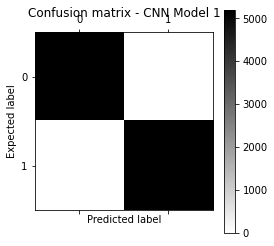

In [0]:
print('CNN model for Dataset 1: ')
print('='*25)
history = CNN_model(1, x_train1, y_train1, x_val1, y_val1, x_test1, y_test1)
print(' ')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


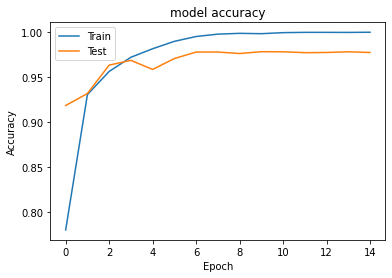

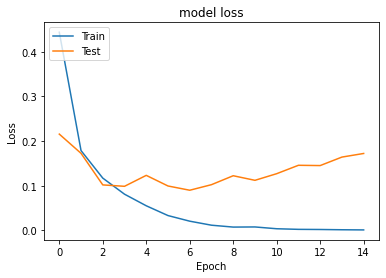

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

CNN model for Dataset 2: 
Fitting the simple convolutional neural network model
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 996, 32)           16032     
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 199, 32)           0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 195, 32)           5152      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 39, 32)            0         
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2991 samples, validate on 1994 samples
Epoch 1/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.6143 - acc: 0.6590 - val_loss: 0.4517 - val_acc: 0.8310
Epoch 2/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.3381 - acc: 0.8502 - val_loss: 0.4660 - val_acc: 0.7703
Epoch 3/15
2991/2991 [==============================] - 36s 12ms/step - loss: 0.1757 - acc: 0.9285 - val_loss: 0.1020 - val_acc: 0.9649
Epoch 4/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0902 - acc: 0.9696 - val_loss: 0.0933 - val_acc: 0.9639
Epoch 5/15
2991/2991 [==============================] - 34s 11ms/step - loss: 0.0475 - acc: 0.9823 - val_loss: 0.0558 - val_acc: 0.9814
Epoch 6/15
2991/2991 [==============================] - 34s 12ms/step - loss: 0.0241 - acc: 0.9930 - val_loss: 0.1454 - val_acc: 0.9448
Epoch 7/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0080 - acc: 0.9983 - val_loss: 0.0515 - val_acc: 0.9845


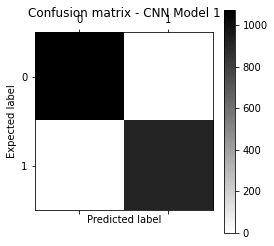

In [0]:
print('CNN model for Dataset 2: ')
print('='*25)
history = CNN_model(2, x_train2, y_train2, x_val2, y_val2, x_test2, y_test2)
print(' ')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


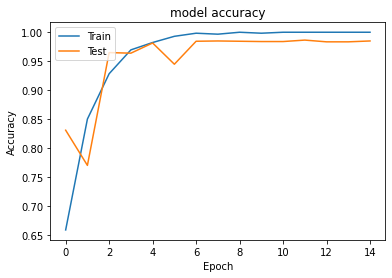

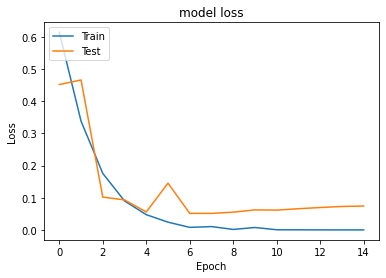

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **DEEP CNN**

In [0]:
### Model for 1st data set (test_data1)
def DCNN_model(n, x_train, y_train, x_val, y_val, x_test, y_test):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    l_cov1= Conv1D(32, 5, activation='relu')(embedded_sequences)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(32, 5, activation='relu')(l_pool1)
    l_pool2 = MaxPooling1D(5)(l_cov2)
    l_cov3 = Conv1D(32, 5, activation='relu')(l_pool2)
    l_pool3 = MaxPooling1D(35)(l_cov3)
    l_flat = Flatten()(l_pool3)
    l_dense = Dense(32, activation='relu')(l_flat)
    l_dense1 = Dense(32, activation='relu')(l_dense)
    l_dense2 = Dense(32, activation='relu')(l_dense1)
    preds = Dense(2, activation='softmax')(l_dense2)

    dcnn_model = Model(sequence_input, preds)
    dcnn_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['acc'])
    print("Fitting the simple convolutional neural network model")
    dcnn_model.summary()
    history = dcnn_model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=32)
    print('\nModel Training Completed !')

    ### PREDICTING 
    y_preds = dcnn_model.predict(x_test)
    y_pred = np.round(y_preds)
    cpred = float(sum(y_pred == y_test)[0])
    cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    print("\n-> Correct predictions:", cpred)
    print("\n-> Total number of test examples:", len(y_test))
    print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
    print("\n-> Confusion matrix for Dataset",n,": ", cm)

    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Confusion matrix - CNN Model 1')
    plt.colorbar()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()
    return history


DCNN model for Dataset 1: 
Fitting the simple convolutional neural network model
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 996, 32)           16032     
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 199, 32)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 195, 32)           5152      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 39, 32)            0         
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15570 samples, validate on 10381 samples
Epoch 1/15
15570/15570 [==============================] - 183s 12ms/step - loss: 0.3698 - acc: 0.8210 - val_loss: 0.1984 - val_acc: 0.9248
Epoch 2/15
15570/15570 [==============================] - 184s 12ms/step - loss: 0.1412 - acc: 0.9453 - val_loss: 0.1376 - val_acc: 0.9455
Epoch 3/15
15570/15570 [==============================] - 182s 12ms/step - loss: 0.0996 - acc: 0.9640 - val_loss: 0.0911 - val_acc: 0.9672
Epoch 4/15
15570/15570 [==============================] - 183s 12ms/step - loss: 0.0705 - acc: 0.9762 - val_loss: 0.0923 - val_acc: 0.9643
Epoch 5/15
15570/15570 [==============================] - 184s 12ms/step - loss: 0.0456 - acc: 0.9854 - val_loss: 0.0809 - val_acc: 0.9749
Epoch 6/15
15570/15570 [==============================] - 183s 12ms/step - loss: 0.0313 - acc: 0.9904 - val_loss: 0.0836 - val_acc: 0.9775
Epoch 7/15
15570/15570 [==============================] - 182s 12ms/step - loss: 0.0173 - acc: 0.9954 - val_loss: 0.

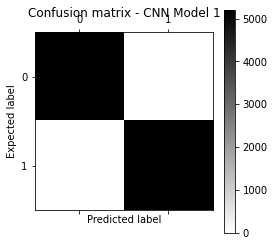

In [0]:
print('DCNN model for Dataset 1: ')
print('='*25)
history = DCNN_model(1, x_train1, y_train1, x_val1, y_val1, x_test1, y_test1)
print(' ')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


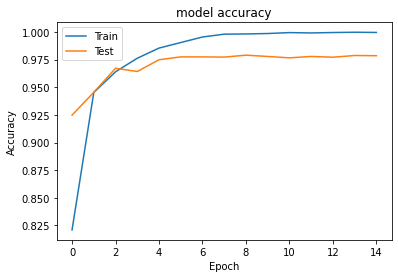

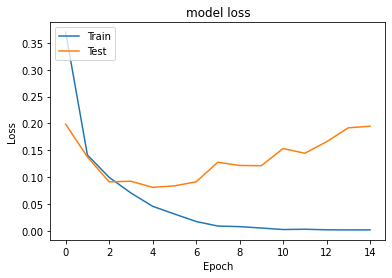

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

DCNN model for Dataset 2: 
Fitting the simple convolutional neural network model
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 996, 32)           16032     
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 199, 32)           0         
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 195, 32)           5152      
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 39, 32)            0         
___________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2991 samples, validate on 1994 samples
Epoch 1/15
2991/2991 [==============================] - 36s 12ms/step - loss: 0.6224 - acc: 0.6339 - val_loss: 0.5888 - val_acc: 0.6921
Epoch 2/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.2725 - acc: 0.8877 - val_loss: 0.1271 - val_acc: 0.9498
Epoch 3/15
2991/2991 [==============================] - 36s 12ms/step - loss: 0.1386 - acc: 0.9442 - val_loss: 0.0778 - val_acc: 0.9724
Epoch 4/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0732 - acc: 0.9719 - val_loss: 0.0608 - val_acc: 0.9779
Epoch 5/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0273 - acc: 0.9916 - val_loss: 0.0600 - val_acc: 0.9809
Epoch 6/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0621 - val_acc: 0.9829
Epoch 7/15
2991/2991 [==============================] - 35s 12ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.1072 - val_acc: 0.9744


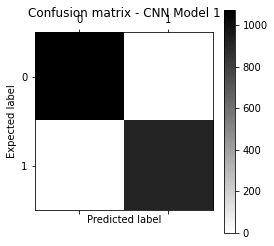

In [0]:
print('DCNN model for Dataset 2: ')
print('='*25)
history = DCNN_model(2, x_train2, y_train2, x_val2, y_val2, x_test2, y_test2)
print(' ')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


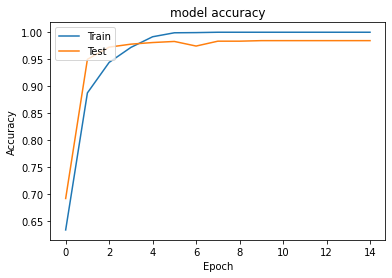

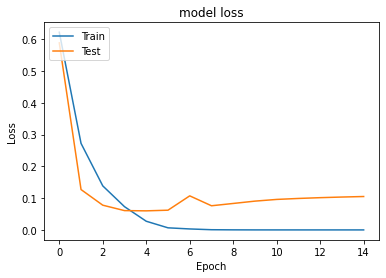

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

DCNN model for Dataset 3: 
Fitting the simple convolutional neural network model
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 32)           16032     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 195, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 39, 32)            0         
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37476 samples, validate on 24985 samples
Epoch 1/15
37476/37476 [==============================] - 461s 12ms/step - loss: 0.3252 - acc: 0.8569 - val_loss: 0.2044 - val_acc: 0.9269
Epoch 2/15
37476/37476 [==============================] - 459s 12ms/step - loss: 0.1764 - acc: 0.9396 - val_loss: 0.1753 - val_acc: 0.9396
Epoch 3/15
37476/37476 [==============================] - 459s 12ms/step - loss: 0.1384 - acc: 0.9545 - val_loss: 0.1405 - val_acc: 0.9557
Epoch 4/15
37476/37476 [==============================] - 456s 12ms/step - loss: 0.1085 - acc: 0.9652 - val_loss: 0.1303 - val_acc: 0.9604
Epoch 5/15
37476/37476 [==============================] - 459s 12ms/step - loss: 0.0829 - acc: 0.9750 - val_loss: 0.2214 - val_acc: 0.9417
Epoch 6/15
37476/37476 [==============================] - 454s 12ms/step - loss: 0.0640 - acc: 0.9821 - val_loss: 0.1581 - val_acc: 0.9515
Epoch 7/15
37476/37476 [==============================] - 454s 12ms/step - loss: 0.0498 - acc: 0.9867 - val_loss: 0.

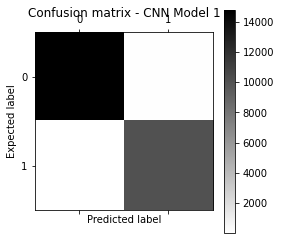

In [31]:
print('DCNN model for Dataset 3: ')
print('='*25)
history = DCNN_model(3, x_train3, y_train3, x_val3, y_val3, x_test3, y_test3)
print(' ')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


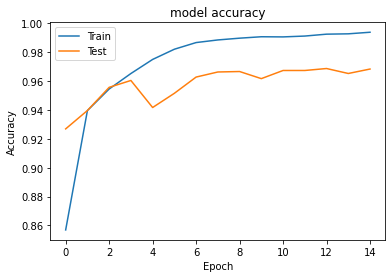

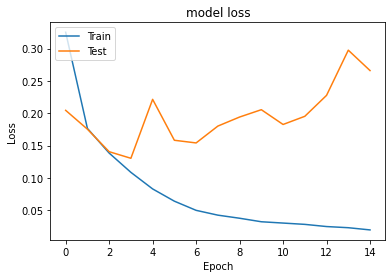

In [32]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **LSTM Model**


In [0]:
### Model for 1st data set (test_data1)
def LSTM_model(n, x_train, y_train, x_val, y_val, x_test, y_test):
    lstm_model = Sequential()
    lstm_model.add(Embedding(len(word_index) + 1, 100, weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False))
    lstm_model.add(LSTM(128))
    lstm_model.add(Dense(128, activation = 'relu'))
    lstm_model.add(Dense(64, activation = 'relu'))
    lstm_model.add(Dense(32, activation = 'relu'))
    lstm_model.add(Dense(2, activation = 'softmax'))
    lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    lstm_model.summary()
    history = lstm_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 15, batch_size = 128)
    print('\nModel Training Complete !')
    
    ### PREDICTION
    y_preds = lstm_model.predict(x_test)
    y_pred = np.round(y_preds)
    cpred = float(sum(y_pred == y_test)[0])
    cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    print("\n-> Correct predictions:", cpred)
    print("\n-> Total number of test examples:", len(y_test))
    print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
    print("\n-> Confusion for Dataset",n,": ", cm)

    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Confusion matrix - CNN Model 1')
    plt.colorbar()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()
    return history

LSTM model for Dataset 1: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_77 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 66        
Total params: 17,070,162
Trainable params: 144,162
Non-trainable params: 16,926,000
_________

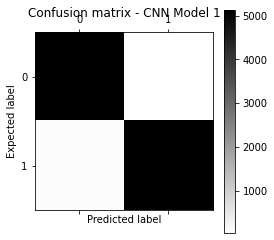

In [0]:
print('LSTM model for Dataset 1: ')
print('='*25)
history = LSTM_model(1, x_train1, y_train1, x_val1, y_val1, x_test1, y_test1)
print(' ')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


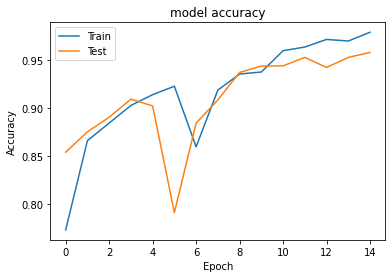

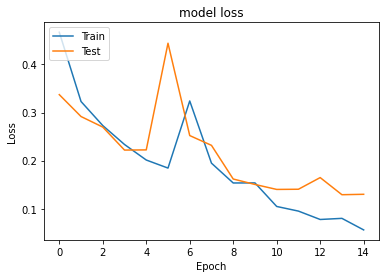

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

LSTM model for Dataset 2: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 100)         16926000  
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_80 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_81 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 66        
Total params: 17,070,162
Trainable params: 144,162
Non-trainable params: 16,926,000
_________

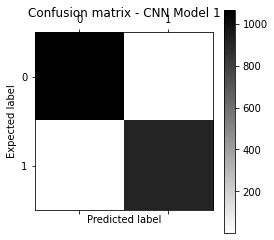

In [0]:
print('LSTM model for Dataset 2: ')
print('='*25)
history = LSTM_model(2, x_train2, y_train2, x_val2, y_val2, x_test2, y_test2)
print(' ')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


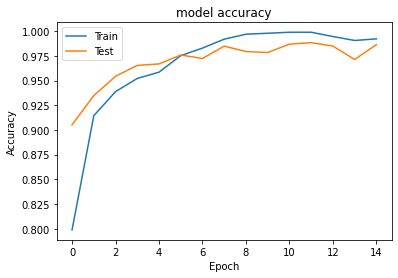

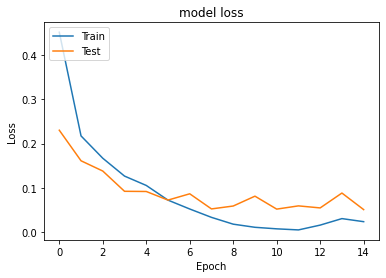

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Multi-Channel CNN**

In [0]:
def define_model(n, x_train, y_train, x_val, y_val, x_test, y_test):
    sequence_input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences1 = embedding_layer(sequence_input1)
    cov1= Conv1D(32, 5, activation='relu')(embedded_sequences1)
    pool1 = MaxPooling1D(5)(cov1)
    flat1 = Flatten()(pool1)

    sequence_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences2 = embedding_layer(sequence_input2)
    cov2 = Conv1D(32, 5, activation='relu')(embedded_sequences2)
    pool2 = MaxPooling1D(5)(cov2)
    flat2 = Flatten()(pool2)

    sequence_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences3 = embedding_layer(sequence_input3)
    cov3 = Conv1D(32, 5, activation='relu')(embedded_sequences3)
    pool3 = MaxPooling1D(35)(cov3)
    flat3 = Flatten()(pool3)

    merge = concatenate([flat1, flat2, flat3])

    # flat4 = Flatten()(merge)
    dense = Dense(32, activation='relu')(merge)
    preds = Dense(2, activation='softmax')(dense)

    model = Model(inputs = [sequence_input1, sequence_input2, sequence_input3], outputs = preds)
    model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['acc'])
    print("Fitting the simple convolutional neural network model")
    model.summary()
    # history = model.fit([x_train, x_train, x_train], y_train, epochs=2, batch_size=32)
    history = model.fit([x_train, x_train, x_train], y_train,validation_data = ([x_val, x_val, x_val], y_val), epochs=12, batch_size=32)
    print('\nModel Training Completed !')

    ### PREDICTION
    y_pred = np.round(model.predict([x_test, x_test, x_test]))
    cpred = float(sum(y_pred == y_test)[0])
    cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    print("\n-> Correct predictions:", cpred)
    print("\n-> Total number of test examples:", len(y_test))
    print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
    print("\n-> Confusion for Dataset",n,": ", cm)

    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Confusion matrix - CNN Model 1')
    plt.colorbar()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return history

In [0]:
history = define_model(1, x_train1, y_train1, x_val1, y_val1, x_test1, y_test1)

Fitting the simple convolutional neural network model
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 100)    16926000    input_4[0][0]                    
                                      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15570 samples, validate on 10381 samples
Epoch 1/12
15570/15570 [==============================] - 373s 24ms/step - loss: 0.3724 - acc: 0.8295 - val_loss: 0.1565 - val_acc: 0.9404
Epoch 2/12
15570/15570 [==============================] - 360s 23ms/step - loss: 0.1433 - acc: 0.9444 - val_loss: 0.1263 - val_acc: 0.9558
Epoch 3/12
15570/15570 [==============================] - 371s 24ms/step - loss: 0.0819 - acc: 0.9714 - val_loss: 0.0911 - val_acc: 0.9700
Epoch 4/12
15570/15570 [==============================] - 377s 24ms/step - loss: 0.0384 - acc: 0.9887 - val_loss: 0.0821 - val_acc: 0.9748
Epoch 5/12
15570/15570 [==============================] - 388s 25ms/step - loss: 0.0130 - acc: 0.9969 - val_loss: 0.0962 - val_acc: 0.9762
Epoch 6/12
15570/15570 [==============================] - 376s 24ms/step - loss: 0.0071 - acc: 0.9986 - val_loss: 0.1014 - val_acc: 0.9765
Epoch 7/12
15570/15570 [==============================] - 371s 24ms/step - loss: 0.0026 - acc: 0.9997 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


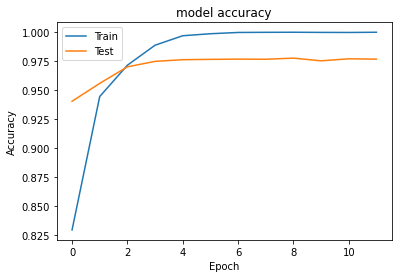

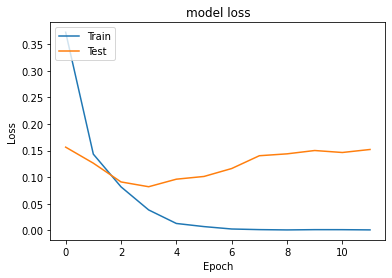

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
 history = define_model(2, x_train2, y_train2, x_val2, y_val2, x_test2, y_test2)

Fitting the simple convolutional neural network model
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 100)    16926000    input_7[0][0]                    
                                      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2991 samples, validate on 1994 samples
Epoch 1/12
2991/2991 [==============================] - 78s 26ms/step - loss: 0.7827 - acc: 0.5811 - val_loss: 0.6619 - val_acc: 0.6515
Epoch 2/12
2991/2991 [==============================] - 76s 25ms/step - loss: 0.6201 - acc: 0.7108 - val_loss: 0.4978 - val_acc: 0.8039
Epoch 3/12
2991/2991 [==============================] - 76s 25ms/step - loss: 0.4319 - acc: 0.8094 - val_loss: 0.2878 - val_acc: 0.8862
Epoch 4/12
2991/2991 [==============================] - 77s 26ms/step - loss: 0.2300 - acc: 0.9034 - val_loss: 0.2808 - val_acc: 0.8711
Epoch 5/12
2991/2991 [==============================] - 75s 25ms/step - loss: 0.1046 - acc: 0.9676 - val_loss: 0.0809 - val_acc: 0.9724
Epoch 6/12
2991/2991 [==============================] - 74s 25ms/step - loss: 0.0401 - acc: 0.9910 - val_loss: 0.0736 - val_acc: 0.9734
Epoch 7/12
2991/2991 [==============================] - 73s 25ms/step - loss: 0.0158 - acc: 0.9977 - val_loss: 0.0603 - val_acc: 0.9784


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


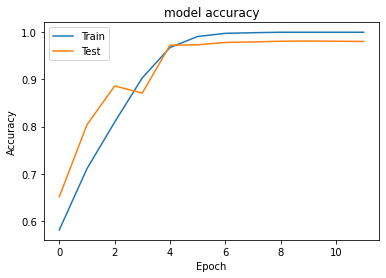

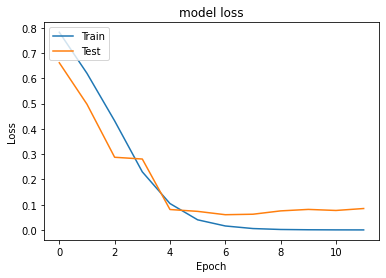

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Fitting the simple convolutional neural network model
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 100)    16926000    input_1[0][0]                    
                                      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37476 samples, validate on 24985 samples
Epoch 1/12
37476/37476 [==============================] - 796s 21ms/step - loss: 0.3074 - acc: 0.8697 - val_loss: 0.2055 - val_acc: 0.9264
Epoch 2/12
37476/37476 [==============================] - 796s 21ms/step - loss: 0.1636 - acc: 0.9446 - val_loss: 0.2795 - val_acc: 0.9084
Epoch 3/12
37476/37476 [==============================] - 789s 21ms/step - loss: 0.1066 - acc: 0.9658 - val_loss: 0.3485 - val_acc: 0.8487
Epoch 4/12
37476/37476 [==============================] - 804s 21ms/step - loss: 0.0631 - acc: 0.9802 - val_loss: 0.2835 - val_acc: 0.8922
Epoch 5/12
37476/37476 [==============================] - 780s 21ms/step - loss: 0.0374 - acc: 0.9887 - val_loss: 0.1437 - val_acc: 0.9684
Epoch 6/12
37476/37476 [==============================] - 785s 21ms/step - loss: 0.0258 - acc: 0.9924 - val_loss: 0.1947 - val_acc: 0.9697
Epoch 7/12
37476/37476 [==============================] - 790s 21ms/step - loss: 0.0206 - acc: 0.9938 - val_loss: 0.

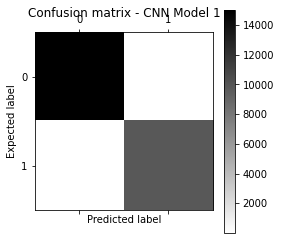

In [55]:
 history = define_model(3, x_train3, y_train3, x_val3, y_val3, x_test3, y_test3)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


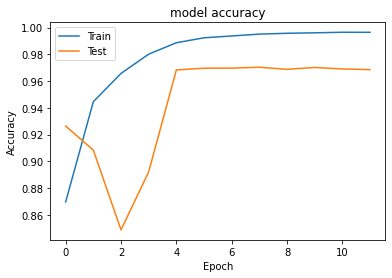

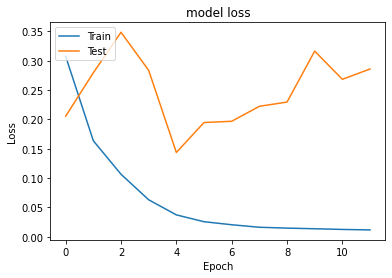

In [56]:

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()